In [42]:
### Supervised Learning Assignment
### Google Play Store Dataset

## Importing various packages which can aid us to work on the dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
import xgboost
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import asarray
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
## Reading the google play store dataset in a dataframe
df = pd.read_csv("D:\\Welingkar\\Trim 5\\IM\\googleplaystore.csv")

In [3]:
## Understanding the dataset columns, rows and check for missing values and draw out data description
# Check the total number of rows and ccolumns
print("Total number of rows and columns in the data set are: ",df.shape)

Total number of rows and columns in the data set are:  (10839, 13)


In [4]:
# Identify the columns present in the dataset
print("The columns in the dataset are as followed: \n", df.columns)

The columns in the dataset are as followed: 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [5]:
# Check the datatypes of each column in python
print("THe data types of each columns are:\n", df.dtypes)

THe data types of each columns are:
 App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [6]:
# Check for null values
print("Check whether there are missing values in the dataset or not:\n", df.isnull().sum())

Check whether there are missing values in the dataset or not:
 App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [7]:
# Print the dataset to view the data
print(df)
df1 = df

                                                     App            Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook      ART_AND_DESIGN   
1                                    Coloring book moana      ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...      ART_AND_DESIGN   
3                                  Sketch - Draw & Paint      ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book      ART_AND_DESIGN   
...                                                  ...                 ...   
10834                                        FP VoiceBot              FAMILY   
10835                                    Fast Tract Diet  HEALTH_AND_FITNESS   
10836                            Trine 2: Complete Story                GAME   
10837                                       sugar, sugar              FAMILY   
10838                               Word Search Tab 1 FR              FAMILY   

       Rating  Reviews   Size  Installs

In [8]:
## Converting the categorical values using one hot encoder
le_Category = LabelEncoder()
le_ContentRating = LabelEncoder()
le_Type = LabelEncoder()

df1['Category_n'] = le_Category.fit_transform(df1['Category'])
df1['Type_n'] = le_Type.fit_transform(df1['Type'])
df1['ContentRating_n'] = le_ContentRating.fit_transform(df1['Content Rating'])

## Convert the Size variable in thousands
for i in range(len(df1)):
    value = df1['Size'].values[i]
    ver = value.isnumeric()
    try:  
        float(value) 
        ver1 = True
    except: 
        ver1 = False
    if ((ver == True) or (ver1 == True)):
        value = float(value) * 1000
        df1['Size'].values[i] = value
    elif value == 'Varies with device':
        df1['Size'].values[i] = 0
    else:
        value = value.replace("k", "")
        df1['Size'].values[i] = value

new = df1["Last Updated"].str.split(", ", n = 1, expand = True)
df1["Last Updated"] = new[1]

## Dropping the unnecessary columns
df1 = df1.drop(['Genres', 'Current Ver', 'Android Ver', 'Category', 'Type', 'Content Rating'], axis = 'columns')

## Impute the missing values of the rating
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].median())
df1['Last Updated'] = df1['Last Updated'].fillna(df1['Last Updated'].mode())
median_size = df1['Size'].median()
df1['Size'] = df1['Size'].replace(0, median_size)

for i in range(len(df1)):
    value = df1["Rating"].values[i]
    if (1<=value<=1.9):
        df1["Rating"].values[i] = 1
    elif (2<=value<=2.9):
        df1["Rating"].values[i] = 2
    elif (3<=value<=3.9):
        df1["Rating"].values[i] = 3
    elif (4<=value<=4.9):
        df1["Rating"].values[i] = 4
    elif value==5:
        df1["Rating"].values[i] = 5
    else:
        df1["Rating"].values[i] = 0


google_data = df1

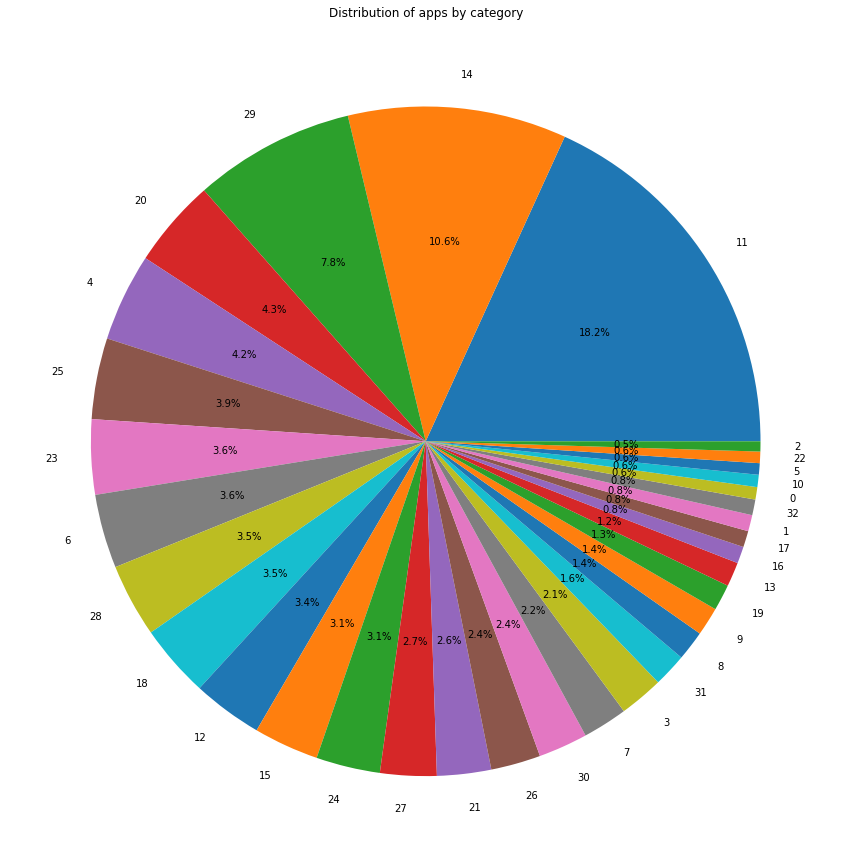

In [9]:
# Barchart
# my_colors = list(islice(cycle(['b', 'r', 'g', 'c', 'y', 'm','k']), None, len(google_data))) # a way to represent different colours 

# google_data.Category.value_counts().plot(kind = 'bar', color = my_colors, figsize = (10,8), title = 'Number of apps in each category');
# plt.xlabel('Category')
# plt.ylabel('Frequency');

# Piechart
df1['Category_n'].value_counts().plot.pie(y = df1['Category_n'], figsize = (15, 16), label = '', autopct = '%1.1f%%', title = 'Distribution of apps by category', );# label = '' removes column name


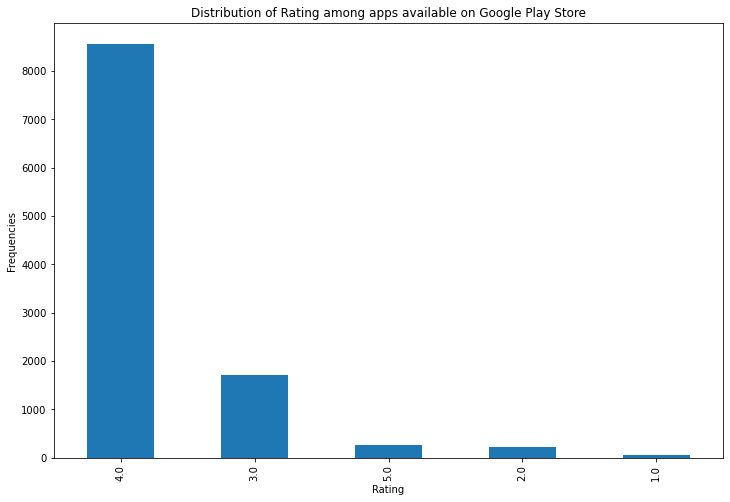

In [10]:
# Barchart
google_data.Rating.value_counts().plot(kind = 'bar', stacked = True, figsize = (12, 8), title = 'Distribution of Rating among apps available on Google Play Store'); # Historgram of frequencies 
plt.xlabel('Rating')
plt.ylabel('Frequencies');

In [11]:
df1.Reviews = pd.to_numeric(df1.Reviews)

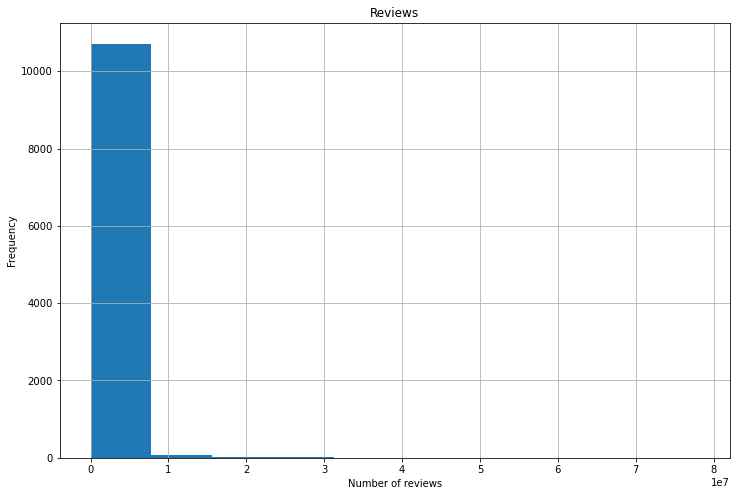

In [12]:
df1.hist(column = 'Reviews', figsize = (12, 8))
plt.xlabel('Number of reviews')
plt.ylabel('Frequency');


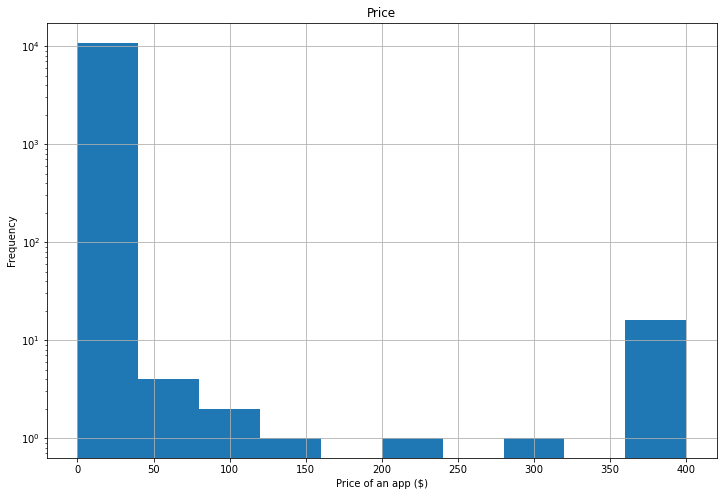

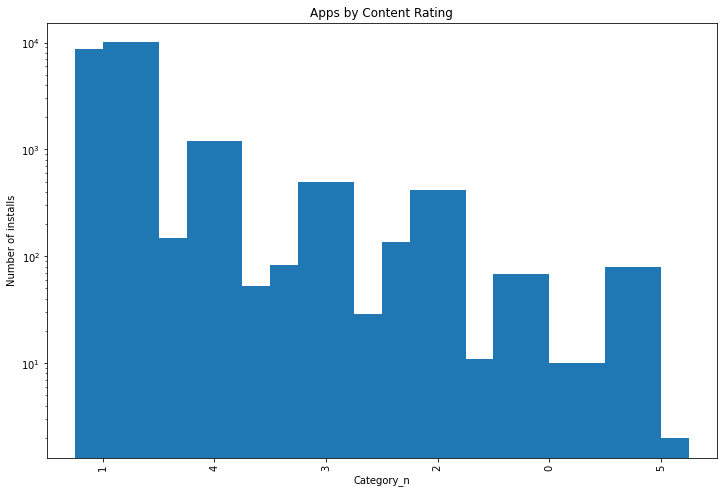

In [13]:
# Log view of the graph
# df1.hist(column = 'Reviews', figsize = (12, 10))
# plt.xlabel('Number of reviews')
# plt.ylabel('Frequency')
# plt.yscale('log')

# Plotting Histogram
# df1.hist(column = 'Size', figsize = (12, 8))
# plt.xlabel('Size of an app (in bytes)')
# plt.ylabel('Frequency')

df1.Price = pd.to_numeric(df1.Price)
df1.hist(column = 'Price', figsize = (12, 8))
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency');
plt.yscale('log')

df1.Price = pd.to_numeric(df1.Price)
df1.hist(column = 'Price', figsize = (12, 8), range = [0, 5])
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency')
plt.yscale('log')

df1['ContentRating_n'].value_counts().plot(kind = 'bar', title = 'Apps by Content Rating',figsize = (12,8)) 
plt.xlabel('Category_n')
plt.ylabel('Number of installs')
plt.yscale('log')

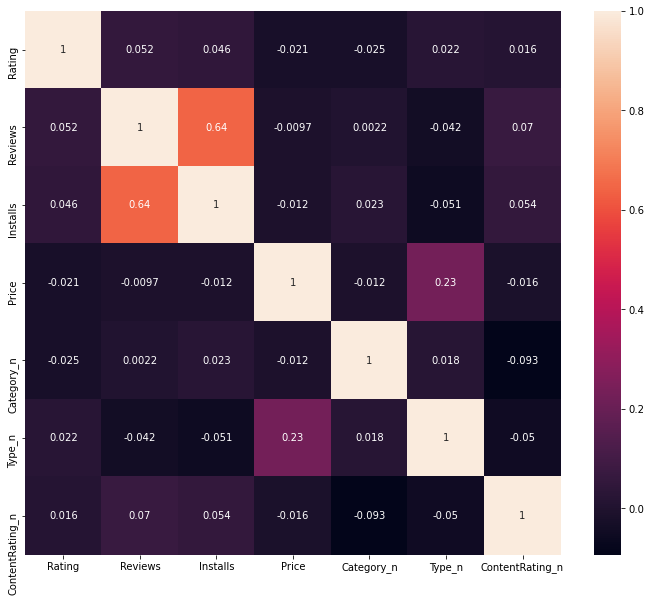

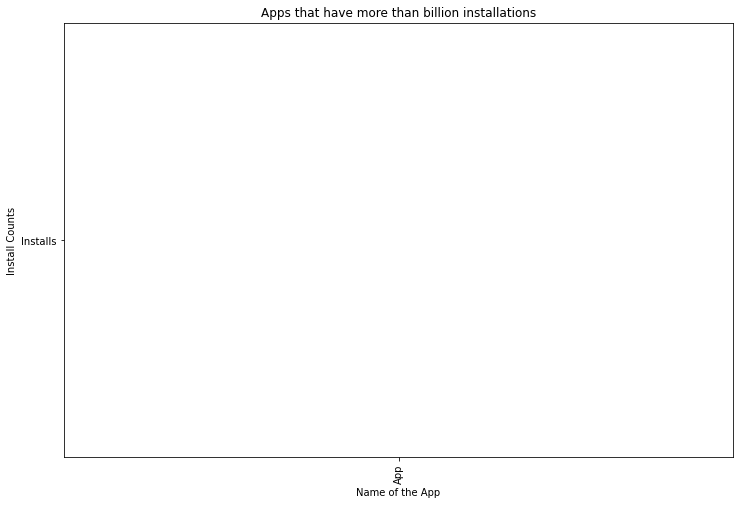

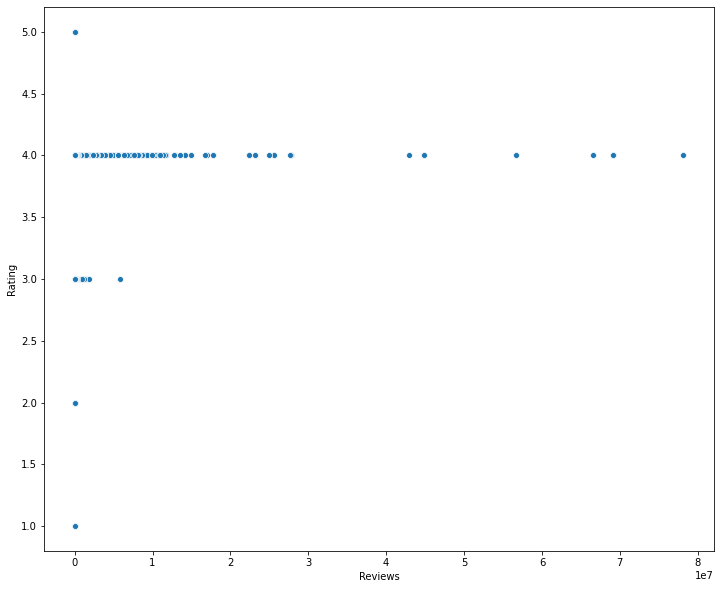

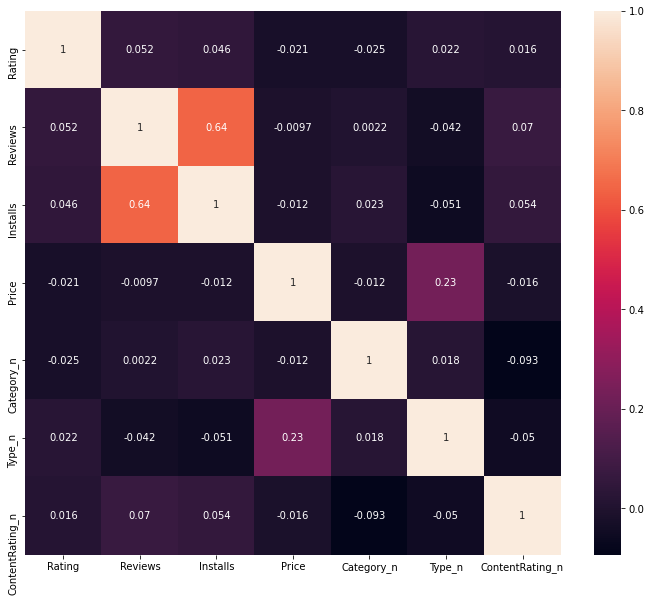

In [14]:
# Correlation map
plt.figure(figsize = (12, 10)); # Adding command before the heatmap allows to control the size of a plot
sns.heatmap(df1.corr(), annot = True);

plt.figure(figsize = (12,8))
plt.bar('App', 'Installs', data = google_data["Installs"], color = 'blue')
plt.xticks(rotation = 90);
plt.xlabel('Name of the App')
plt.ylabel('Install Counts')
plt.title('Apps that have more than billion installations');

plt.figure(figsize = (12,10))
sns.scatterplot(x = df1.Reviews, y = df1.Rating, edgecolor = 'white');

plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Installs, y = google_data.Rating, edgecolor = 'white');

sns.heatmap(df1.corr(), annot = True)

In [15]:
## Identify the predictors and the target variable
X = df1.drop(['Rating', 'App'], axis = 'columns')
y = df1['Rating']

## Split the dataset into train and test model
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 3)
# Print and understand the train test
print("The dimensions of the Train Dataset\n   Predictors dataset dimension: {}\n   Target dataset dimension: {}"\
      .format(X_train.shape, y_train.shape))
print("The dimensions of the Test Dataset\n   Predictors dataset dimension: {}\n   Target dataset dimension: {}"\
      .format(X_test.shape, y_test.shape))

The dimensions of the Train Dataset
   Predictors dataset dimension: (8671, 8)
   Target dataset dimension: (8671,)
The dimensions of the Test Dataset
   Predictors dataset dimension: (2168, 8)
   Target dataset dimension: (2168,)


In [16]:
## Apply Logistic Regression on the model
print("------------Regression------------")
lr = LogisticRegression()
# Fit the model
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
# Print the required results
print('Coefficients of the logistic regression is: \n', lr.coef_)
print("\n")
print('Variance score of the model is: ',format(lr.score(X_test, y_test)))
print ("Logistic regression train score: ", train_score)
print ("Logistic regression test score: ", test_score)

------------Regression------------
Coefficients of the logistic regression is: 
 [[-2.72830756e-06 -9.26878377e-05 -5.84266775e-05 -2.92148311e-08
  -2.37361494e-05 -1.95433668e-07 -1.89271280e-09 -1.56077382e-08]
 [-1.12440574e-05 -6.33109288e-05  5.00983501e-05 -2.00524882e-08
  -2.85276574e-05 -2.33877965e-07 -2.03459172e-09 -1.90454480e-08]
 [ 4.89949728e-06  6.27987454e-05  5.19358701e-05  3.46796427e-08
  -3.37181575e-05 -2.89162936e-07 -2.24591690e-09 -1.78370103e-08]
 [ 1.20891490e-05  1.08190485e-04  5.19154015e-05  4.33622372e-08
   9.88926740e-05  8.29585079e-07  7.59344337e-09  6.09339694e-08]
 [-3.01628133e-06 -1.49904642e-05 -9.55229441e-05 -2.87745606e-08
  -1.29107097e-05 -1.11110510e-07 -1.42022195e-09 -8.44377286e-09]]


Variance score of the model is:  0.7859778597785978
Logistic regression train score:  0.7902202744781456
Logistic regression test score:  0.7859778597785978


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print('Coefficients of the logistic regression is: \n', lr.coef_)
print('Variance score: {}'.format(lr.score(X_test, y_test)))

Coefficients of the logistic regression is: 
 [[-2.72830756e-06 -9.26878377e-05 -5.84266775e-05 -2.92148311e-08
  -2.37361494e-05 -1.95433668e-07 -1.89271280e-09 -1.56077382e-08]
 [-1.12440574e-05 -6.33109288e-05  5.00983501e-05 -2.00524882e-08
  -2.85276574e-05 -2.33877965e-07 -2.03459172e-09 -1.90454480e-08]
 [ 4.89949728e-06  6.27987454e-05  5.19358701e-05  3.46796427e-08
  -3.37181575e-05 -2.89162936e-07 -2.24591690e-09 -1.78370103e-08]
 [ 1.20891490e-05  1.08190485e-04  5.19154015e-05  4.33622372e-08
   9.88926740e-05  8.29585079e-07  7.59344337e-09  6.09339694e-08]
 [-3.01628133e-06 -1.49904642e-05 -9.55229441e-05 -2.87745606e-08
  -1.29107097e-05 -1.11110510e-07 -1.42022195e-09 -8.44377286e-09]]
Variance score: 0.7859778597785978


No handles with labels found to put in legend.


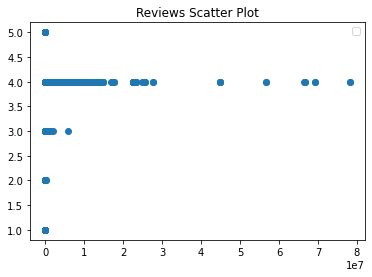

In [18]:
fig, ax1 = plt.subplots()
ax1.scatter(X_train["Reviews"], y_train)
## plotting legend 
plt.legend(loc = 'upper right') 
## plot title 
plt.title("Reviews Scatter Plot") 
## function to show plot 
plt.show() 

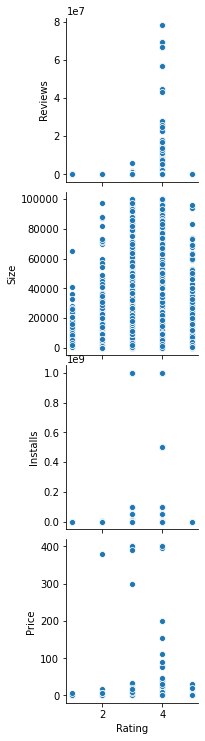

In [19]:
pp = sns.pairplot(data=df1, x_vars=['Rating'], y_vars=['Reviews', 'Size', 'Installs', 'Price'])

In [20]:
## Apply Ridge regression on the model
print("------------Ridge Regression------------")
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; 
#low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("ridge regression train score low alpha: ", Ridge_train_score)
print ("ridge regression test score low alpha: ", Ridge_test_score)
print ("ridge regression train score high alpha: ", Ridge_train_score100)
print ("ridge regression test score high alpha: ", Ridge_test_score100)

------------Ridge Regression------------
ridge regression train score low alpha:  0.014365938477299944
ridge regression test score low alpha:  0.016750070205082235
ridge regression train score high alpha:  0.014314170098824963
ridge regression test score high alpha:  0.01635384913461746


C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.27405e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.8183e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [21]:
print ("Logistic regression train score:", train_score)
print("\n")
print ("Logistic regression test score:", test_score)
print("\n")
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

Logistic regression train score: 0.7902202744781456


Logistic regression test score: 0.7859778597785978


ridge regression train score low alpha: 0.014365938477299944
ridge regression test score low alpha: 0.016750070205082235
ridge regression train score high alpha: 0.014314170098824963
ridge regression test score high alpha: 0.01635384913461746


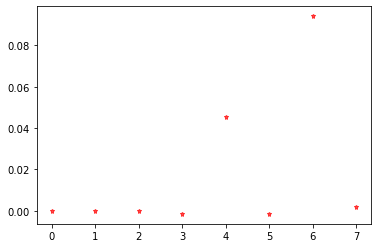

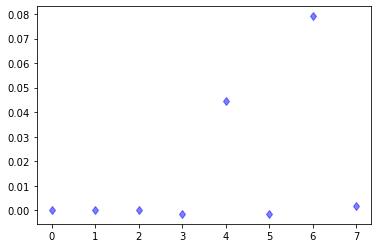

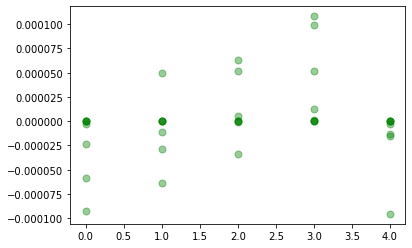

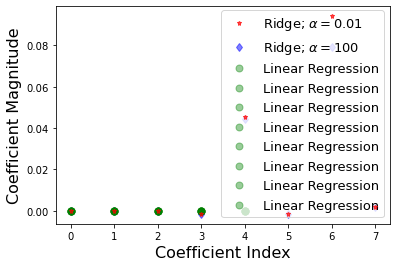

In [22]:
fig, ax2 = plt.subplots()
ax2.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
fig, ax3 = plt.subplots()
ax3.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
fig, ax4 = plt.subplots()
ax4.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
fig, ax5 = plt.subplots()
ax5.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
ax5.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
ax5.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

In [23]:
## Apply Laso Regression
print("------------Laso Regression------------")
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("Training Score: {}, Test Score: {}\nNumber of features used: {}".format(train_score, test_score, coeff_used))
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("Training Score (for alpha=0.01): {}, Test Score (for alpha=0.01): {}\nNumber of features used (for alpha=0.01): {}"\
      .format(train_score001, test_score001, coeff_used001))
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("Training Score (for alpha=0.0001): {}, Test Score (for alpha=0.0001): {}\nNumber of features used (for alpha=0.0001): {}"\
      .format(train_score00001, test_score00001, coeff_used00001))

------------Laso Regression------------
Training Score: 0.0038843617196875346, Test Score: 0.002385390147474298
Number of features used: 3
Training Score (for alpha=0.01): 0.012054714957537516, Test Score (for alpha=0.01): 0.01163464250190982
Number of features used (for alpha=0.01): 6
Training Score (for alpha=0.0001): 0.014365217550516896, Test Score (for alpha=0.0001): 0.01670404879311327
Number of features used (for alpha=0.0001): 8


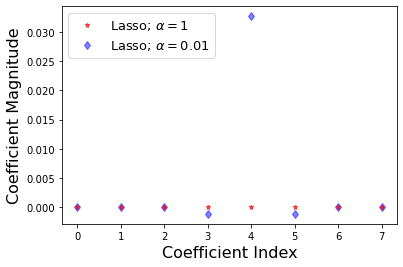

In [24]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
# alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') 
# alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=2)

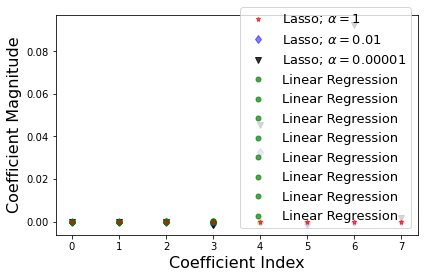

In [25]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) 
# alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
# alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$')
# alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [26]:
## Decision Tree
print("------------Decision Tree------------")
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The Decision Tree model gives score\n  Train: {}\n  Test: {}".format(model.score(X_train, y_train), \
                                                                            model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print("\nThe accuracy on prediciton and test", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report of Decision Tress:\n",classification_report(y_test, y_pred))

------------Decision Tree------------
The Decision Tree model gives score
  Train: 0.999654019144274
  Test: 0.7047970479704797

The accuracy on prediciton and test 0.7047970479704797

Classification Report of Decision Tress:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.05      0.06      0.06        47
         3.0       0.30      0.33      0.32       337
         4.0       0.84      0.81      0.83      1711
         5.0       0.32      0.34      0.33        61

    accuracy                           0.70      2168
   macro avg       0.30      0.31      0.31      2168
weighted avg       0.72      0.70      0.71      2168



In [27]:
## Decision Tree
print("------------Decision Tree------------")
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
model.fit(X_train, y_train)
print("The Decision Tree model gives score\n  Train: {}\n  Test: {}".format(model.score(X_train, y_train), \
                                                                            model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print("\nThe accuracy on prediciton and test", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report of Decision Tress:\n",classification_report(y_test, y_pred))

------------Decision Tree------------
The Decision Tree model gives score
  Train: 0.7906815822857802
  Test: 0.7892066420664207

The accuracy on prediciton and test 0.7892066420664207

Classification Report of Decision Tress:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        47
         3.0       0.00      0.00      0.00       337
         4.0       0.79      1.00      0.88      1711
         5.0       0.00      0.00      0.00        61

    accuracy                           0.79      2168
   macro avg       0.16      0.20      0.18      2168
weighted avg       0.62      0.79      0.70      2168



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
# Fitting the Grid Search
params = {'n_estimators':[34,35,65,45]}
grid = GridSearchCV(estimator = model,param_grid = params,scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)
grid_pred = model.predict(X_test)
print("The decision tree model after applying grid search gives the following score\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}".format(grid.score(X_train, y_train), grid.score(X_test, y_test), accuracy_score(y_test, grid_pred)))
print("Classification Report of Decision Tree:\n",classification_report(y_test, grid_pred))

ValueError: Invalid parameter n_estimators for estimator DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=1, splitter='random'). Check the list of available parameters with `estimator.get_params().keys()`.

In [35]:
## Random Forrest
print("------------Random Forrest------------")
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The random forest model gives score\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(model.score(X_train, y_train), model.score(X_test, y_test), accuracy_score(y_test, y_pred)))
print("Classification Report of Random Forrest:\n",classification_report(y_test, y_pred))
scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Score of random forest: ", model.score(X_test, y_test))
print("Accuracy: %0.2f" % (scores.mean()))

------------Random Forrest------------
The random forest model gives score
  Train: 0.9892745934724945
  Test: 0.7739852398523985
  Accuracy of the model: 0.7739852398523985
Classification Report of Random Forrest:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.17      0.04      0.07        47
         3.0       0.42      0.28      0.34       337
         4.0       0.83      0.92      0.87      1711
         5.0       0.31      0.15      0.20        61

    accuracy                           0.77      2168
   macro avg       0.35      0.28      0.30      2168
weighted avg       0.73      0.77      0.75      2168

Cross Validation Score of random forest:  0.7739852398523985
Accuracy: 0.74


In [36]:
cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix for random forest:\n",cm)

The confusion matrix for random forest:
 [[   0    0    1   11    0]
 [   1    2   13   30    1]
 [   0    4   96  236    1]
 [   2    6  114 1571   18]
 [   0    0    2   50    9]]


In [37]:
# Fitting the Grid Search
params = {'n_estimators':[34,35,65,45]}
grid = GridSearchCV(estimator = model,param_grid = params,scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)
grid_pred = model.predict(X_test)
print("The random forest model after applying grid search gives the following score\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}".format(grid.score(X_train, y_train), grid.score(X_test, y_test), accuracy_score(y_test, grid_pred)))
print("Classification Report of Random Forrest:\n",classification_report(y_test, grid_pred))

The random forest model after applying grid search gives the following score
  Train: 0.9993080382885481
  Test: 0.7818265682656826
  Accuracy of the model: 0.7739852398523985
Classification Report of Random Forrest:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.17      0.04      0.07        47
         3.0       0.42      0.28      0.34       337
         4.0       0.83      0.92      0.87      1711
         5.0       0.31      0.15      0.20        61

    accuracy                           0.77      2168
   macro avg       0.35      0.28      0.30      2168
weighted avg       0.73      0.77      0.75      2168



In [31]:
## Boosting Methods
print("------------Gradient Boosting------------")
# evaluate the model gradient boost
model = GradientBoostingClassifier()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',\
                           cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Accuracy Gradient", model.score(X_train, y_train))

------------Gradient Boosting------------
MAE: -0.243 (0.016)
Accuracy Gradient 0.8089032406873486


In [32]:
# evaluate the model CatBoost
print("------------CatBoost Classifier------------")
model = CatBoostClassifier(verbose = 0, n_estimators = 100)
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error',\
                           cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose = 0, n_estimators = 100)
model.fit(X_train, y_train)
print("Accuracy CatBoost", model.score(X_train, y_train))

------------CatBoost Classifier------------
MAE: -0.240 (0.015)
Accuracy CatBoost 0.8328912466843501


In [33]:
# evaluate the model Adaboost
print("------------AdaBoost Classifier------------")
regr = AdaBoostClassifier(random_state = 0, n_estimators = 100)
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(regr, X_train, y_train, scoring='neg_mean_absolute_error',\
                           cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
regr = AdaBoostClassifier(random_state = 0, n_estimators = 100)
regr.fit(X, y)
print("Accuracy Adaboost", regr.score(X_train, y_train))

------------AdaBoost Classifier------------
MAE: -1.057 (0.340)
Accuracy Adaboost 0.5595663706608235


In [34]:
## Naive Bayesian
print("------------Naive Bayesian------------")
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of the Naive Bayes\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(model.score(X_train,y_train), model.score(X_test,y_test), accuracy_score(y_test, y_pred)))
print("Cross Validation of the Naive Bayesian Model: ",cross_val_score(GaussianNB(),X_train, y_train, cv=5))
print("\nClassification Report of Decision Tress:\n",classification_report(y_test, y_pred))

------------Naive Bayesian------------
Accuracy of the Naive Bayes
  Train: 0.17010725406527505
  Test: 0.16512915129151293
  Accuracy of the model: 0.16512915129151293
Cross Validation of the Naive Bayesian Model:  [0.1648415  0.15743945 0.18915802 0.16262976 0.21510957]

Classification Report of Decision Tress:
               precision    recall  f1-score   support

         1.0       0.00      0.08      0.00        12
         2.0       0.01      0.04      0.01        47
         3.0       0.15      0.20      0.17       337
         4.0       0.98      0.13      0.23      1711
         5.0       0.09      1.00      0.16        61

    accuracy                           0.17      2168
   macro avg       0.25      0.29      0.12      2168
weighted avg       0.80      0.17      0.22      2168



In [ ]:
hyper = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],         'kernel':['rbf','linear']}
params = {'n_estimators':[34,35,65,45]}
grid = GridSearchCV(SVC(), param_grid = hyper, scoring = 'accuracy', cv = 5)
print("Here")
grid.fit(X_train, y_train)
print("Here")
grid_pred = model.predict(X_test)
print("The Naive Bayes model after applying grid search gives the following score\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}".format(grid.score(X_train, y_train), grid.score(X_test, y_test), accuracy_score(y_test, grid_pred)))
print("Classification Report of Naive Bayes:\n",classification_report(y_test, grid_pred))

#search = GridSearchCV(SVC(), parameters, cv=5)

Here
